In [16]:
import sys 

sys.path.append('..')

import my_cv 

In [17]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

## Histogram Equalization  

-  To find an intensity mapping function, f(I)
    - such that the histogram is flat

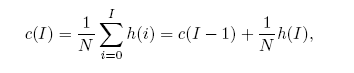

In [67]:
# demo_img = cv2.imread('../flowers/daisies_00049.jpg')
demo_img = cv2.imread("../flower.png", 0)
print(demo_img.shape)

(960, 1280)


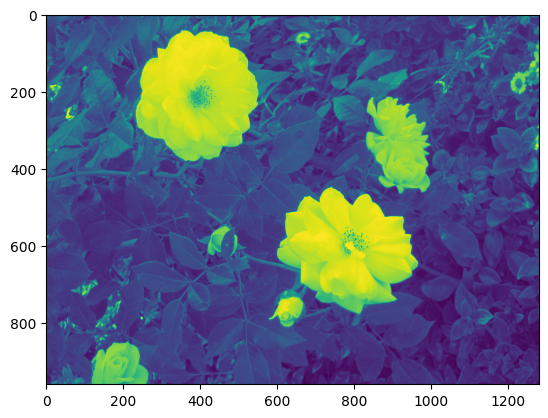

In [68]:
plt.imshow(demo_img)

In [70]:
# my_cv.plot_hist(demo_img)

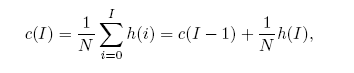

In [71]:
N = np.product(demo_img.shape) 
N

1228800

In [72]:
# r,g,b = cv2.split(demo_img)
# r.shape

ValueError: not enough values to unpack (expected 3, got 1)

In [58]:
def return_cI(color_channel):
    N = np.prod(color_channel.shape)
    c_i = np.zeros_like(color_channel)
    for x in range(color_channel.shape[0]):
        for y in range(color_channel.shape[1]):
            c_i[x][y] =  c_i[x-1][y-1] + color_channel[x][y]/N 

    return c_i 

In [24]:
r_c_i = return_cI(r)[:,:,np.newaxis]
g_c_i = return_cI(g)[:,:,np.newaxis]
b_c_i = return_cI(b)[:,:,np.newaxis]

In [25]:
g_c_i.shape

(1340, 2237, 1)

In [26]:
integrated_image = np.concatenate((r_c_i,  g_c_i, b_c_i), axis=2)
print(integrated_image.shape, demo_img.shape)

(1340, 2237, 3) (1340, 2237, 3)


In [27]:
integrated_image[0, 0, :], demo_img[0, 0, :]

(array([0, 0, 0], dtype=uint8), array([9, 6, 8], dtype=uint8))

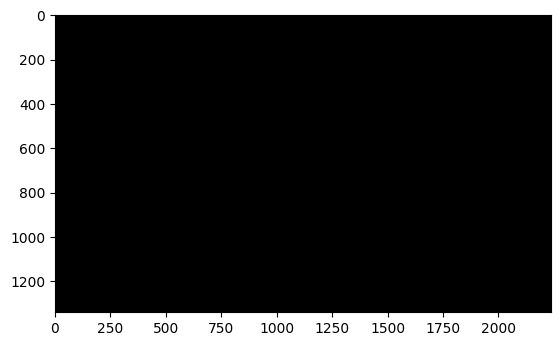

In [28]:
plt.imshow(integrated_image)

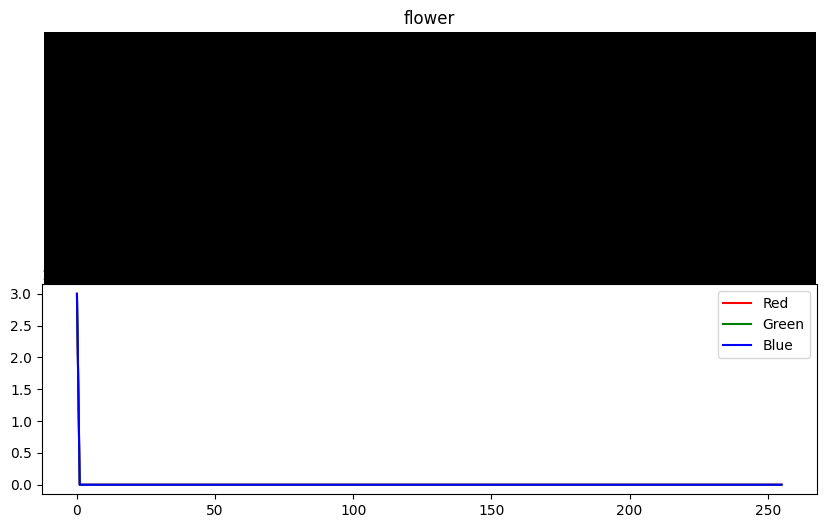

In [29]:
my_cv.plot_hist(integrated_image)

### Using OpenCV

In [75]:
demo_img_hist = cv2.calcHist([demo_img],[0], None, [256], [0,256])
demo_img_hist.shape

(256, 1)

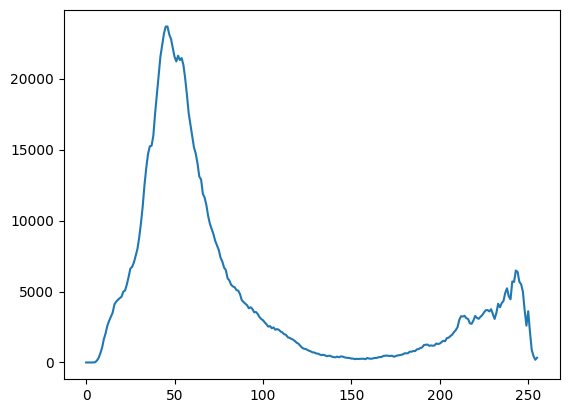

In [76]:
plt.plot(demo_img_hist)

In [83]:
equalized = cv2.equalizeHist(demo_img) 
equalized.shape 

(960, 1280)

In [84]:
demo_img.shape 

(960, 1280)

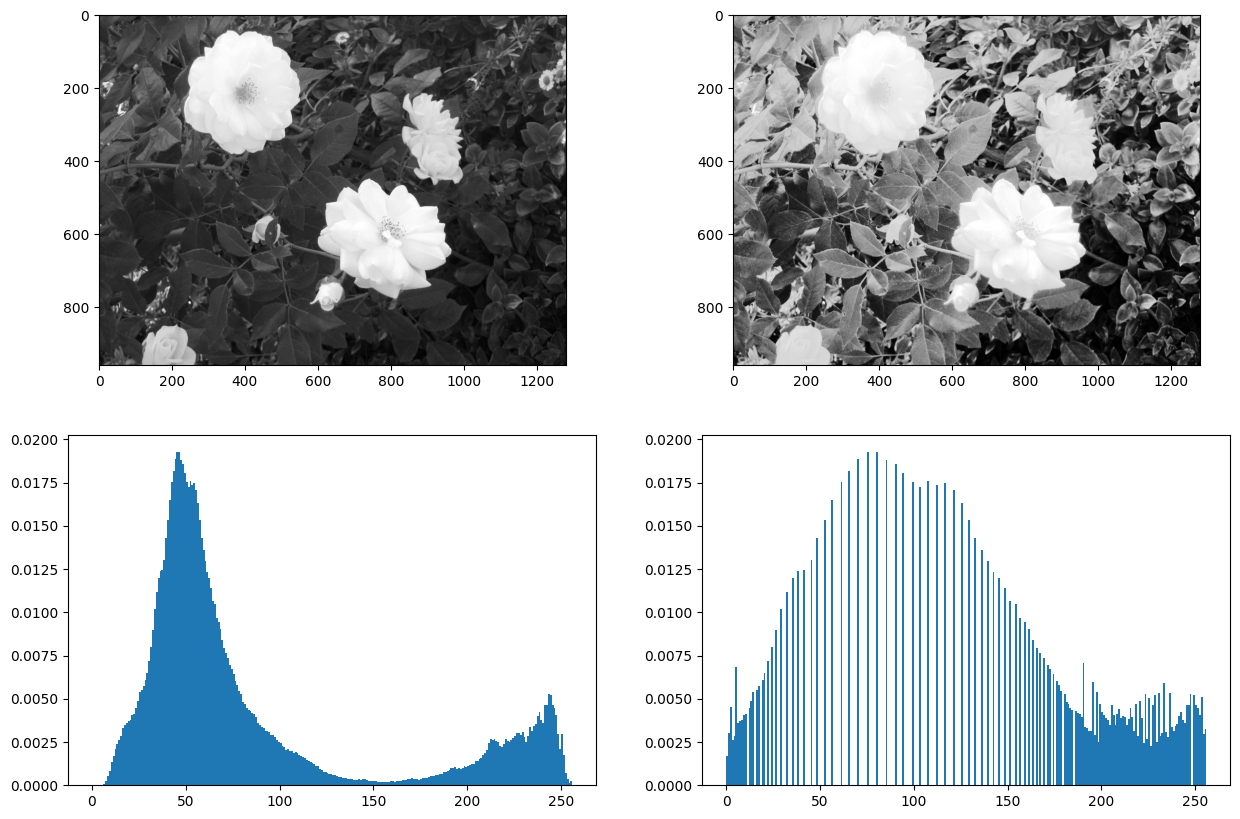

In [88]:
f, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].imshow(demo_img, cmap='gray')
axes[0][1].imshow(equalized, cmap='gray')

axes[1][0].hist(demo_img.flatten(), 256, [0,256], 'blue') 
axes[1][1].hist(equalized.flatten(), 256, [0,256], 'blue') 
plt.show() 